<a href="https://colab.research.google.com/github/leegyuhi/oooooooooooooh/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8, return_sequences=True))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 8)           1312      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 33,865
Trainable params: 33,865
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all), (x_test, y_test)=imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i]=[w for w in x_train_all[i] if w>2]

import numpy as np
np.random.seed(42)
random_index=np.random.permutation(25000)

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]



17465344/17464789 [==============================] - 2s 0us/step


In [0]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [6]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.4511 - accuracy: 0.7887 - val_loss: 0.3831 - val_accuracy: 0.8380
Epoch 2/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.3354 - accuracy: 0.8577 - val_loss: 0.3527 - val_accuracy: 0.8466
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3101 - accuracy: 0.8702 - val_loss: 0.3649 - val_accuracy: 0.8428
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2908 - accuracy: 0.8765 - val_loss: 0.3521 - val_accuracy: 0.8506
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2713 - accuracy: 0.8845 - val_loss: 0.3663 - val_accuracy: 0.8432
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2563 - accuracy: 0.8913 - val_loss: 0.3816 - val_accuracy: 0.8468
Epoch 7/10
20000/20000 [==============================] -

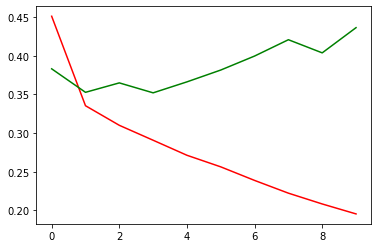

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.show()

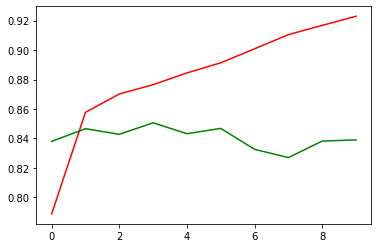

In [8]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.show()

In [9]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.839
